# DATA Gathering

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [2]:
# The following packages (libraries) need to be installed. You can install these packages via conda or pip.
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [3]:
twitter_archive_enhanced =  pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive_clean =  twitter_archive_enhanced.copy()

In [5]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [7]:

image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
result = requests.get(image_predictions_url)
print(result)
# result.content

<Response [200]>


In [8]:
#save the image_predictions.tsv on local to use in pndas dataframe 
# import os
local_dir = 'image_prediction_folder'
if not os.path.exists(local_dir):
    os.makedirs(local_dir)


# save the image_predictions.tsv to local dir
with open(os.path.join(local_dir,image_predictions_url.split('/')[-1]),mode = 'wb') as file:
    file.write(result.content)

In [9]:
image_predictions = pd.read_csv('image_prediction_folder/image-predictions.tsv', sep='\t')
image_predictions_clean =  image_predictions.copy()
# image_predictions_clean

In [10]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [13]:

# Authentication process to use Tweepy API
API_key = '***'
API_key_secret = "***"
access_token = "***"
access_token_secret = "****"

auth = tweepy.OAuthHandler(API_key,API_key_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [14]:
api

In [24]:
tweet_ids = twitter_archive_enhanced['tweet_id']
# list(tweet_ids)

In [33]:
# tweet1 = api.get_status(tweet_ids[0])
tweet1

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [40]:
# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
tweets_found = []

# Any tweet_ids not found by API, are appended to e_list
tweets_not_found = []

for tweet_id in tweet_ids:
    try:
        page = api.get_status( tweet_id, tweet_mode = 'extended')
        favorites_count = page['favorite_count']
        retweet_count = page['retweet_count']
        tweets_found.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
#         print(tweet_id, favorites_count, retweet_count)
    
    except Exception as e:
        tweets_not_found.append(tweet_id)

Rate limit reached. Sleeping for: 138
Rate limit reached. Sleeping for: 103


In [41]:
tweets_found[:5]

[{'tweet_id': 892420643555336193, 'favorites': 2356, 'retweet_count': 7477},
 {'tweet_id': 892177421306343426, 'favorites': 2356, 'retweet_count': 5549},
 {'tweet_id': 891815181378084864, 'favorites': 2356, 'retweet_count': 3671},
 {'tweet_id': 891689557279858688, 'favorites': 2356, 'retweet_count': 7652},
 {'tweet_id': 891327558926688256, 'favorites': 2356, 'retweet_count': 8250}]

In [43]:
tweets_not_found

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [50]:
tweets_found_df = pd.DataFrame(tweets_found, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [51]:
tweets_found_df.head(5)

,tweet_id,favorites,retweet_count
0,892420643555336193,2356,7477
1,892177421306343426,2356,5549
2,891815181378084864,2356,3671
3,891689557279858688,2356,7652
4,891327558926688256,2356,8250


In [52]:
tweets_found_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [54]:
tweets_found_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)

In [55]:
tweets_found_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


# Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [57]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [88]:
twitter_archive_clean[twitter_archive_clean['name'].str[0]=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [65]:
twitter_archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [90]:
twitter_archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [98]:
twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [93]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [99]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Quality Issues 

## completeness, validity, accuracy, and consistency issues
1. Nubber of records in twitter_archive_enhanced.csv is 2356 while image_predictions_df has 2075. 
2. retweeted_status_id in twitter_archive_df is not relvant as the actual count will be fetched from twitter.
3. Values in Name colum caontains incroeect names such as 'a','an','all'
4. rating_denominator is other then 10
5. rating_numerator alos have some random values. 
6. source colum is not found useful. 
7. +0000 (2015-11-16 00:24:50 +0000) in timestamp is of no meaning. 
8. retweeted_status_id  and retweeted_status_user_id are  float64

In [102]:
# twitter_archive_clean.info()
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Tidiness 
## structural issues
 1. there are values in colums names i.e. dog category doggo, floffer, pupper, and puppo  should be in one colums of of twitter_archive_clean.
2. In image_predictions_clean there are 3 predictions for dog breed which increases the dataframe size, instead of single best  prediction is enough for analysis. 
3. Entrie data is splitted in 3 dataframes which can be conoslidated in a single dataframe for better data analysis. 

# Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [103]:

# save data to local
tweets_clean =  tweets_found_df.copy()
twitter_archive_clean.to_csv('twitter_archive_clean.csv',encoding='utf-8',index=False)
image_predictions_clean.to_csv('image_predictions_clean.csv',encoding='utf-8',index=False)
tweets_clean.to_csv('tweets_clean.csv',encoding='utf-8',index=False)

In [105]:
# load data to pandas dataframe from local
archive_clean = pd.read_csv('twitter_archive_clean.csv')
images_clean = pd.read_csv('image_predictions_clean.csv')
tweets_clean = pd.read_csv('tweets_clean.csv')



In [114]:
# create master dataframe by merging all three in one
# tweets_clean.columns
# merge archive and image data

master_df = pd.merge(archive_clean, images_clean, on=['tweet_id','tweet_id'],how='left')


In [115]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [116]:
master_df = pd.merge(master_df, tweets_clean, on='tweet_id',how='left')

In [117]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweet_count'],
      dtype='object')

In [118]:
master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2356.0,7477.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2356.0,5549.0


In [120]:
master_df.iloc[0]

tweet_id                                                     892420643555336193
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 16:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [121]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [122]:
# save master df to local
master_df.to_csv('master_df.csv',encoding='utf-8',index=False)

In [123]:
master_df_clean =  pd.read_csv("master_df.csv")

In [124]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Data cleaning
## 1. deleting retweets and replies

In [125]:
master_df_clean = master_df_clean[master_df_clean.retweeted_status_id.isnull()]
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [126]:
master_df_clean = master_df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [128]:
# master_df_clean.info()

In [130]:
master_df_clean = master_df_clean[master_df_clean.in_reply_to_status_id.isnull()]

In [132]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  doggo                  2097 non-null   object 
 11  floofer                2097 non-null   object 
 12  pupper                 2097 non-null   object 
 13  puppo                  2097 non-null   object 
 14  jpg_url                1971 non-null   object 
 15  img_

In [133]:
master_df_clean = master_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [135]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  jpg_url             1971 non-null   object 
 13  img_num             1971 non-null   float64
 14  p1                  1971 non-null   object 
 15  p1_conf             1971 non-null   float64
 16  p1_dog

## 2. deleting tweets without images

In [136]:
master_df_clean = master_df_clean[master_df_clean.jpg_url.notnull()]

In [137]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  jpg_url             1971 non-null   object 
 13  img_num             1971 non-null   float64
 14  p1                  1971 non-null   object 
 15  p1_conf             1971 non-null   float64
 16  p1_dog

In [138]:
master_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites',
       'retweet_count'],
      dtype='object')

In [139]:
# fix the tidiness issue by melting the four columns into one dog types colum
master_df_clean_1 = pd.melt(master_df_clean, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [141]:
master_df_clean_1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2356.0,7477.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2356.0,5549.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None


In [142]:
master_df_clean_1.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [152]:
master_df_clean_2 =master_df_clean_1.copy()

In [160]:
master_df_clean_2 = master_df_clean_2.drop_duplicates('tweet_id')

In [161]:
master_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

In [162]:
master_df_clean_2.dog_type

1895     None
1894     None
1893     None
1892     None
1891     None
        ...  
6046    puppo
6390    puppo
6588    puppo
6443    puppo
6618    puppo
Name: dog_type, Length: 1971, dtype: object

In [169]:
master_df_clean_2 =master_df_clean_1.copy()

In [170]:
# master_df_clean_2 = master_df_clean_2.sort_values('dog_type').drop_duplicates('tweet_id')
master_df_clean_2 = master_df_clean_2.sort_values('dog_type').drop_duplicates('tweet_id',keep='last')

In [173]:
master_df_clean_2.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [176]:
master_df_clean_2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,2356.0,206.0,...,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,2356.0,79.0,...,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None


In [177]:
pd.set_option("display.max_columns",30)

In [178]:
master_df_clean_2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,2356.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,2356.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None


## 3. Predict the most likely dog dreed  

In [181]:
p_breed = []
p_conf = []

# select the dog bred based on p1, p2 and p3 breed and confidence.
def dog_breed(record):
    if record['p1_dog'] == True:
        p_breed.append(record['p1'])
        p_conf.append(record['p1_conf'])
    elif record['p2_dog'] == True:
        p_breed.append(record['p2'])
        p_conf.append(record['p2_conf'])
    elif record['p3_dog'] == True:
        p_breed.append(record['p3'])
        p_conf.append(record['p3_conf'])
    else:
        p_breed.append('Unknown')
        p_conf.append(0)
        
# apply dog_breed to the master_df_clean_2
master_df_clean_2.apply(dog_breed, axis=1)

# add the dog breed and confidence to the master_df_clean_2
master_df_clean_2['breed'] = p_breed
master_df_clean_2['confidence'] = p_conf



In [182]:
master_df_clean_2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,2356.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,2356.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None,Rottweiler,0.999091


In [183]:
# drop p1, p2, p3 as the the most likely bred proediction is added to the master dataframe
master_df_clean_2 = master_df_clean_2.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [185]:
master_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  types               1971 non-null   object 
 12  dog_type            1971 non-null   object 
 13  breed               1971 non-null   object 
 14  confidence          1971 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 246

## 4. Correct the dog names  
these names doesn't seems correct : 
'a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'light', 'my', 'not',
       'officially', 'one', 'quite', 'space', 'such', 'the', 'this',
       'unacceptable', 'very'

In [195]:
# Check the list of dog names.
master_df_clean_2['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe',
       'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella',
       'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb',
       'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue',
       'B

In [204]:
names = list(master_df_clean_2['name'])
wrong_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'light', 'my', 'not',
       'officially', 'one', 'quite', 'space', 'such', 'the', 'this',
       'unacceptable', 'very']

In [209]:
for i,n in enumerate(names):
    if n in wrong_names:
#         print(n)
        names[i]='None'


In [210]:
names

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'None',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'None',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'None',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'None',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'None',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'None',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'None',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'None',
 'Lugan',
 'None',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kr

In [211]:
master_df_clean_2['name']=names

In [212]:
master_df_clean_2['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe',
       'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella',
       'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb',
       'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue',
       'B

In [214]:
master_df_clean_2['name'].value_counts()

None            622
Charlie          11
Oliver           10
Cooper           10
Lucy             10
               ... 
Arlen             1
Cleopatricia      1
Chloe             1
Roscoe            1
Ben               1
Name: name, Length: 913, dtype: int64

## 5. REmoving the records with rating_denominator other than 10

In [219]:
master_df_clean_2 = master_df_clean_2[master_df_clean_2['rating_denominator'] ==10]

In [218]:
master_df_clean_2.shape

(1971, 15)

In [220]:
master_df_clean_2.shape

(1954, 15)

## 6. Remove trailling +0000 from timestamp column and change data type to datetime

In [222]:
master_df_clean_2.timestamp = master_df_clean_2.timestamp.str.strip('+0000')

In [224]:
import datetime

In [226]:
master_df_clean_2.timestamp = pd.to_datetime(master_df_clean_2.timestamp)

In [229]:
master_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1954 non-null   int64         
 1   timestamp           1954 non-null   datetime64[ns]
 2   source              1954 non-null   object        
 3   text                1954 non-null   object        
 4   expanded_urls       1954 non-null   object        
 5   rating_numerator    1954 non-null   int64         
 6   rating_denominator  1954 non-null   int64         
 7   name                1954 non-null   object        
 8   favorites           1947 non-null   float64       
 9   retweet_count       1947 non-null   float64       
 10  jpg_url             1954 non-null   object        
 11  types               1954 non-null   object        
 12  dog_type            1954 non-null   object        
 13  breed               1954 non-null   object   

In [230]:
master_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1954 non-null   int64         
 1   timestamp           1954 non-null   datetime64[ns]
 2   source              1954 non-null   object        
 3   text                1954 non-null   object        
 4   expanded_urls       1954 non-null   object        
 5   rating_numerator    1954 non-null   int64         
 6   rating_denominator  1954 non-null   int64         
 7   name                1954 non-null   object        
 8   favorites           1947 non-null   float64       
 9   retweet_count       1947 non-null   float64       
 10  jpg_url             1954 non-null   object        
 11  types               1954 non-null   object        
 12  dog_type            1954 non-null   object        
 13  breed               1954 non-null   object   

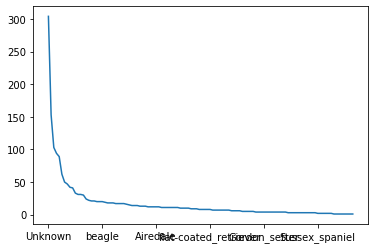

In [247]:
master_df_clean_2['breed'].value_counts().plot()

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set style of plots with seaborn
sns.set(style="darkgrid",font_scale=1.5)

In [408]:
master_df_clean_2[master_df_clean_2['breed']!='Unknown'].groupby('breed').count()['rating_numerator'].sort_values(ascending=False).nlargest(10)

breed
golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              89
pug                    62
toy_poodle             50
chow                   47
Samoyed                42
Pomeranian             41
malamute               33
Name: rating_numerator, dtype: int64

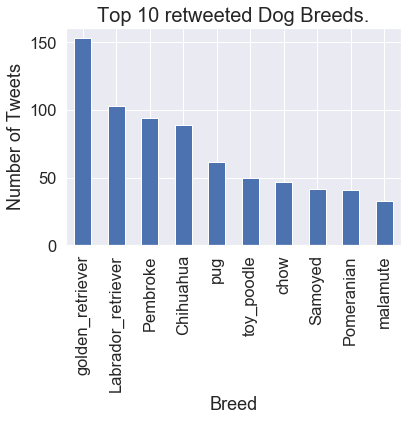

In [407]:
# fig = plt.figure(figsize=(15,8))
master_df_clean_2[master_df_clean_2['breed']!='Unknown'].groupby('breed').count()['rating_numerator'].sort_values(ascending=False).nlargest(10).plot(kind='bar')
# master_df_clean_2.breed.value_counts().plot(kind='bar')
# .sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 10 retweeted Dog Breeds.",fontsize=20)
plt.xlabel("Breed")
plt.ylabel("Number of Tweets");

In [304]:
master_df_clean_3 = master_df_clean_2[(master_df_clean_2['rating_numerator']<=14) & (master_df_clean_2['breed']!='Unknown')] 

In [305]:
master_df_clean_3.describe()

,rating_numerator,rating_denominator,retweet_count,confidence
count,1647.000000,1647.0,1640.000000,1647.000000
mean,10.819672,10.0,2439.540244,0.550855
std,1.782772,0.0,4442.747569,0.298950
min,0.000000,10.0,11.000000,0.000010
25%,10.000000,10.0,547.500000,0.305147
50%,11.000000,10.0,1210.000000,0.550796
75%,12.000000,10.0,2768.500000,0.822075
max,14.000000,10.0,75500.000000,0.999956


In [306]:
master_df_clean_3['rating_numerator'].describe()

count    1647.000000
mean       10.819672
std         1.782772
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [307]:
df_temp1 = master_df_clean_3.groupby('breed')['rating_numerator'].describe()


In [381]:
df_temp1.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [308]:
df_temp1.sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
golden_retriever,153.0,11.555556,1.312335,5.0,11.00,12.0,12.0,14.0
Labrador_retriever,103.0,11.203883,1.345721,7.0,10.00,11.0,12.0,14.0
Pembroke,94.0,11.425532,1.719523,4.0,11.00,12.0,12.0,14.0
Chihuahua,89.0,10.539326,2.067366,3.0,10.00,11.0,12.0,14.0
pug,62.0,10.241935,1.816910,3.0,9.25,10.0,11.0,13.0
...,...,...,...,...,...,...,...,...
Irish_wolfhound,1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
standard_schnauzer,1.0,12.000000,NaN,12.0,12.00,12.0,12.0,12.0
EntleBucher,1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0


In [309]:
# save to local twitter_archive_master.csv: combined and cleaned data 
master_df_clean_3.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [327]:
df_temp2 = master_df_clean_3.groupby('name')

In [343]:
master_df_clean_3[master_df_clean_3['name']!="None"]['name'].value_counts().head(10)

Charlie    10
Lucy       10
Cooper     10
Oliver      9
Tucker      9
Penny       8
Daisy       7
Winston     7
Sadie       7
Lola        6
Name: name, dtype: int64

In [350]:
master_df_clean_3[master_df_clean_3['dog_type']!="None"]['dog_type'].value_counts()

pupper     172
doggo       54
puppo       22
floofer      8
Name: dog_type, dtype: int64

In [361]:
master_df_clean_3[master_df_clean_3['breed']!="None"]['breed'].value_counts()

golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              89
pug                    62
                     ... 
silky_terrier           1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
EntleBucher             1
Name: breed, Length: 112, dtype: int64

In [374]:
df_temp3  = master_df_clean_3[master_df_clean_3['dog_type']!='None']
# df_temp3

In [382]:
# pd.pivot_table(df_temp3, index=[ 'dog_type','breed'], values='retweet_count', aggfunc=np.sum).sort_values('count',ascending=False)

In [352]:
master_df_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1647 non-null   object        
 1   timestamp           1647 non-null   datetime64[ns]
 2   source              1647 non-null   object        
 3   text                1647 non-null   object        
 4   expanded_urls       1647 non-null   object        
 5   rating_numerator    1647 non-null   int64         
 6   rating_denominator  1647 non-null   int64         
 7   name                1647 non-null   object        
 8   favorites           1640 non-null   object        
 9   retweet_count       1640 non-null   float64       
 10  jpg_url             1647 non-null   object        
 11  types               1647 non-null   object        
 12  dog_type            1647 non-null   object        
 13  breed               1647 non-null   object   

In [360]:
# master_df_clean_3['source']

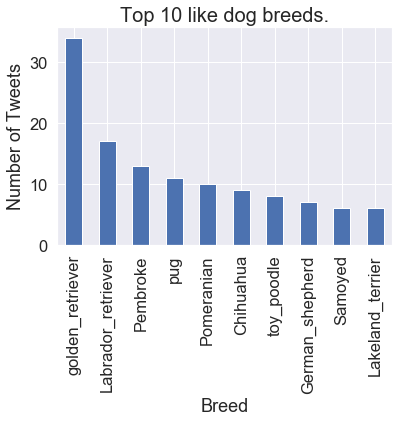

In [403]:
df_temp3.groupby(by='breed')['favorites'].count().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("Top 10 like dog breeds.",fontsize=20)
plt.xlabel("Breed")
plt.ylabel("Number of Tweets");

In [ ]:
master_df_clean_2[master_df_clean_2['name']!='None'].groupby('name').count()['rating_numerator'].sort_values(ascending=False).nlargest(10)

In [412]:
master_df_clean_3['name'].value_counts().nlargest(11)

None       466
Charlie     10
Lucy        10
Cooper      10
Tucker       9
Oliver       9
Penny        8
Winston      7
Daisy        7
Sadie        7
Koda         6
Name: name, dtype: int64

Reporting for this Project
Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.

In [416]:
import re

In [417]:
df_temp4 = master_df_clean_3.copy()

In [418]:
df_temp4['source'] = df_temp4['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [419]:
#  at least 8 quality issues and at least 2 tidiness issues in this dataset

In [421]:
df_temp4['source'].value_counts()

Twitter for iPhone    1616
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

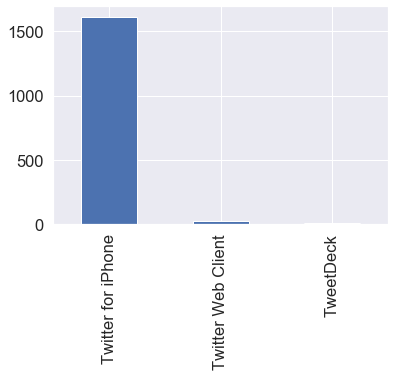

In [424]:
df_temp4['source'].value_counts().plot(kind='bar')

In [425]:
de_temp2

In [426]:
master_df_clean_3['dog_type']

1895     None
1894     None
1891     None
1890     None
1889     None
        ...  
6408    puppo
6046    puppo
6390    puppo
6588    puppo
6618    puppo
Name: dog_type, Length: 1647, dtype: object

In [449]:
df_temp5 = master_df_clean_3[master_df_clean_3['dog_type']!='None']

In [455]:
pd.pivot_table(data=df_temp5,index=['dog_type'])

,confidence,rating_denominator,rating_numerator,retweet_count
dog_type,,,,
doggo,0.513015,10,11.925926,6337.396226
floofer,0.577395,10,11.875000,4069.125000
pupper,0.593198,10,10.877907,2190.151163
puppo,0.637540,10,12.000000,6102.500000


In [456]:
df_temp5['dog_type'].value_counts()

pupper     172
doggo       54
puppo       22
floofer      8
Name: dog_type, dtype: int64